1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

zp_mean = sum(zp) / len(zp)
ks_mean = sum(ks) / len(ks)
cov = sum([(x - zp_mean) * (y - ks_mean) for x, y in zip(zp, ks)]) / (len(zp) - 1)  # non-biased
cov_ = sum([(x - zp_mean) * (y - ks_mean) for x, y in zip(zp, ks)]) / len(zp)  # biased
cov, cov_

(10175.377777777778, 9157.84)

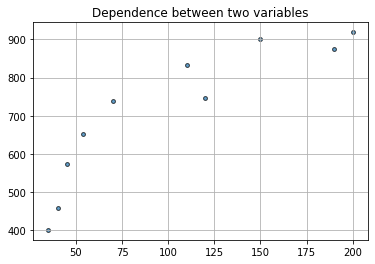

In [16]:
plt.title('Dependence between two variables')
plt.scatter(zp, ks, alpha=0.7, ec='black', s=15)
plt.grid()
plt.show()

In [3]:
import numpy as np

np.cov(zp, ks, ddof=1)[0, 1], np.cov(zp, ks, ddof=0)[0,1]

(10175.377777777776, 9157.84)

In [4]:
# sigma for zp and ks
sig_cov_zp = (sum([(x - zp_mean)**2 for x in zp]) / (len(zp) - 1))**0.5 # non-biased
sig_cov_ks = (sum([(x - ks_mean)**2 for x in ks]) / (len(ks) - 1))**0.5 # non-biased
sig_cov_zp_ = (sum([(x - zp_mean)**2 for x in zp]) / len(zp))**0.5 # biased
sig_cov_ks_ = (sum([(x - ks_mean)**2 for x in ks]) / len(ks))**0.5 # biased
sig_cov_zp, sig_cov_ks

(62.31318747531162, 183.99544076477068)

In [5]:
# pearson coefs
pearson_coef = cov / (sig_cov_zp * sig_cov_ks)
pearson_coef_ = cov_ / (sig_cov_zp_ * sig_cov_ks_)
pearson_coef, pearson_coef_

(0.8874900920739162, 0.8874900920739162)

In [6]:
# with numpy
(np.cov(zp, ks, ddof=1) / (np.array(zp).std(ddof=1) * np.array(ks).std(ddof=1)))[0,1]

0.887490092073916

In [7]:
# with numpy corrcoef
np.corrcoef(zp, ks)[0, 1]

0.8874900920739162

In [8]:
# with pandas
import pandas as pd

pd.DataFrame(np.stack([zp, ks], axis=1)).corr()

,0,1
0,1.00000,0.88749
1,0.88749,1.00000


In [17]:
# relationship between zp and ks may be not linear according to scatter plot
# computing kendall correlation just for practice as an exercise

from itertools import combinations

def is_concordant(pair1: tuple, pair2: tuple) -> bool:
    return (pair1[0] - pair2[0]) * (pair1[1] - pair2[1]) > 0

P = 0
Q = 0

for pair1, pair2 in combinations(zip(zp, ks), r=2):
    if is_concordant(pair1, pair2):
        P += 1
    else:
        Q += 1

assert len(set(ks)) == len(set(zp)), 'lists should contain unique values'

tau = (P - Q) / (P + Q)
tau

0.9111111111111111

In [18]:
pd.DataFrame({'zp': zp, 'ks': ks}).corr(method='kendall')

,zp,ks
zp,1.000000,0.911111
ks,0.911111,1.000000


2. Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.


In [20]:
# calculating confidence intervals
from scipy import stats

students_iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

alpha = 0.05
n = students_iq.shape[0]
t1 = stats.t.ppf(alpha / 2, df=n-1)
t2 = stats.t.ppf(1 - alpha / 2, df=n-1)
sigma = students_iq.std(ddof=1)

students_iq.mean() + t1 * sigma / np.sqrt(n), students_iq.mean() + t2 * sigma / np.sqrt(n) 

(110.55608365158724, 125.64391634841274)

In [21]:
# width of CI
(students_iq.mean() + t2 * sigma / np.sqrt(n)) - (students_iq.mean() + t1 * sigma / np.sqrt(n)) 

15.087832696825501

In [22]:
# found expected value (mu)
t = stats.ttest_1samp(students_iq, popmean=118.1)
t

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [23]:
# CI with scipy
from scipy.stats import sem

stats.t.interval(0.95, len(students_iq) - 1, loc=np.mean(students_iq), scale=sem(students_iq)) 

(110.55608365158724, 125.64391634841274)

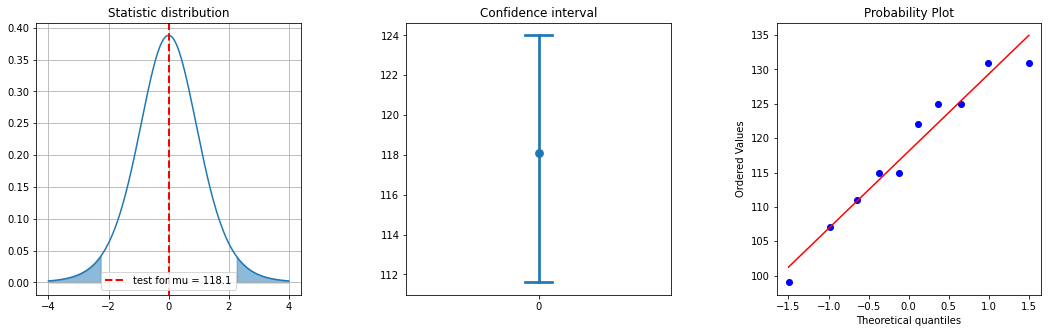

Normal distribution


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, shapiro

ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.title('Statistic distribution')
plt.plot(ox, oy)
plt.axvline(t[0], c='r', ls='--', lw=2, label='test for mu = 118.1')
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')
plt.grid()
plt.legend()
plt.subplot(132)
plt.title('Confidence interval')
sns.pointplot(data=students_iq, capsize=.1)
plt.subplot(133)
probplot(students_iq, dist='norm', plot=plt)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()
print('Normal distribution' if shapiro(students_iq)[1] > alpha else 'Not normal distribution')

3. Известно, что рост футболистов в сборной распределен нормально
с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27,
среднее выборочное составляет 174.2. Найдите доверительный интервал для математического
ожидания с надежностью 0.95.


In [31]:
popmean = 174.2
n = 27
p = 0.95
alpha = 1 - p
d = 25
sigma = np.sqrt(d)

t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

(popmean + t2 * sigma / np.sqrt(n)), (popmean + t1 * sigma / np.sqrt(n)) 

(176.08597622346028, 172.3140237765397)

К задаче 1

Проведите тест на значимость коэффициента корреляции Пирсона, найденного в предыдущей задаче. Что для этого нужно знать:
* Нулевая гипотеза: реальный коэффициент корреляции равен 0. Альтернативная гипотеза двухсторонняя.
* Статистика: `t = r * sqrt(n - 2) / sqrt(1 - r ** 2)`, где `r` - коэффициент корреляции Пирсона, посчитанный по выборке.
* В предположении верности нулевой гипотезы эта статистика имеет распределение Стьюдента с параметром `df = n - 2`.

В качестве ответа запишите 1, если нулевая гипотеза верна, и 0 иначе.

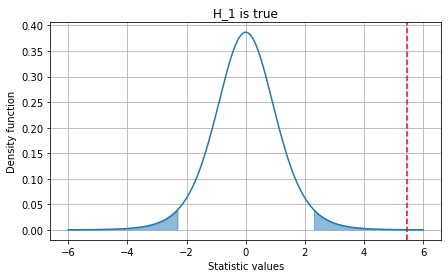

0


In [32]:
coef = 0
alpha = 0.05

t = pearson_coef * np.sqrt(len(ks) - 2) / np.sqrt(1 - pearson_coef ** 2)

t1 = stats.t.ppf(alpha/2, df=len(ks)-2)
t2 = stats.t.ppf(1-alpha/2, df=len(ks)-2)

ox = np.linspace(-6, 6, 500)
oy = stats.t.pdf(ox, df=len(ks)-2)

ox_left = np.linspace(-6, t1, 100)
oy_left = stats.t.pdf(ox_left, df=len(ks)-2)

ox_right = np.linspace(t2, 6, 100)
oy_right = stats.t.pdf(ox_right, df=len(ks)-2)

plt.figure(figsize=(7,4))
plt.plot(ox, oy)
plt.axvline(t, ls='--', lw=1.5, c='r')
hyp = 'The H_0 is true' if t < t2 and t > t1 else 'H_1 is true'
plt.title(hyp)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')
plt.xlabel('Statistic values')
plt.ylabel('Density function')
plt.grid()
plt.show()

print(1 if t > t1 and t < t2 else 0)

In [33]:
p_left = stats.t.cdf(t, df=len(ks)-2)
p_right = 1 - stats.t.cdf(t, df=len(ks)-2)

pvalue = 2 * min(p_left, p_right)

print(f'P-value for test: {pvalue:4f}')
print(f'H_0 is true' if pvalue > alpha else 'H_1 is true, H_0 rejected')

P-value for test: 0.000611
H_1 is true, H_0 rejected


4. Выберите тему для проектной работы по курсу Теории вероятностей и математической статистики
и напишите ее в комментарии к Практическому заданию.


Не уверен, что наличие проектной работы в интерактивном курсе является чем-то естесственным, но если она действительно предусмотрена, то буду работать с датасетом, выгруженным мной с auto.ru, где буду использовать полученные навыки для поиска выбросов, оценки важности признаков, статистической значимости модели регресии и т.п.